<a href="https://colab.research.google.com/github/AshishMekhe/Capstone-Project-Airbnb-Data-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [4]:
# Importing libraries for analysing the dataset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing of Dataset
airbnb_data = pd.read_csv("/content/Airbnb NYC 2019 (2).csv")
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# checking the size of Data
airbnb_data.shape


(48895, 16)

In [8]:
# Checking the column name 
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Checking for Categorical and Numerical Columns

In [9]:
# Checking for categorical columns 
cat_var = [i for i in airbnb_data.columns if airbnb_data[i].dtype=='O']
cat_var

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [10]:
# Checking for numwerical columns 
num_var = [i for i in airbnb_data.columns if airbnb_data[i].dtype!='O']
num_var

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Cleaning the Dataset


In [11]:
# Get the count of null values in each columns
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
temp_df = pd.DataFrame({'columns':airbnb_data.columns,'missing %':airbnb_data.isnull().sum()/len(airbnb_data)})
temp_df

,columns,missing %
id,id,0.000000
name,name,0.000327
host_id,host_id,0.000000
host_name,host_name,0.000429
neighbourhood_group,neighbourhood_group,0.000000
neighbourhood,neighbourhood,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
room_type,room_type,0.000000
price,price,0.000000


#### From above obsevation we can find that the data in the column name has 0.03% data missing and column host_name has 0.043% data missing. So we can repalce missing values with 'Unknown'

In [13]:
airbnb_data['name'].fillna('Unknown', inplace=True)
airbnb_data['host_name'].fillna('Unknown', inplace=True)

In [14]:
airbnb_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### From above obsevation we can find that the data in the column last_review  and column reviews_per_month has 20.55% data missing. So we can simply drop those columns as we don't need those columns in our analysis.

In [15]:
clean_df = airbnb_data.drop(["last_review","reviews_per_month"], axis=1)

In [16]:
clean_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Now there are no missing values in clean_df. So we can move to further analysis.

In [17]:
# Droping columns - id and host_id because they will not be used in our analysis. 
clean_df.drop(["id","host_id"], axis=1,inplace=True)

In [18]:
# checking final cleaned dataset
clean_df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [19]:
# lets rename clean_df as airbnb_data
airbnb_data = clean_df.copy()
airbnb_data.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## **Exploratory Data Analysis**

####  **Question-1)** Top 10 hosts which has most number of listings

In [20]:
# checking the top 10 hosts which has most number of listings
top_10_hosts = airbnb_data.groupby(["host_name"]).count()['calculated_host_listings_count'].reset_index()
top_10_hosts=top_10_hosts.sort_values(by=['calculated_host_listings_count'], ascending=False).head(10)
top_10_hosts

,host_name,calculated_host_listings_count
7135,Michael,417
2376,David,403
9781,Sonder (NYC),327
4989,John,294
314,Alex,279
1356,Blueground,232
9213,Sarah,227
2277,Daniel,226
4840,Jessica,205
6684,Maria,204


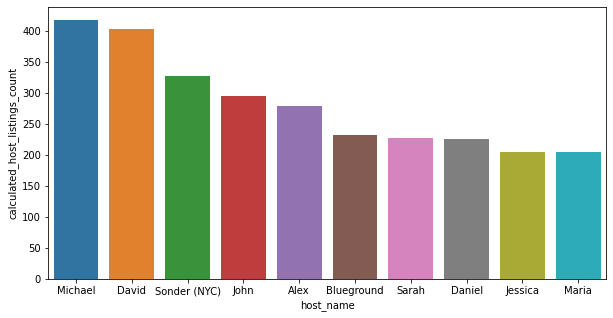

In [21]:
# Graphical Representation of above Result
plt.figure(figsize=(10,5))

sns.barplot(x="host_name",y='calculated_host_listings_count',data = top_10_hosts)


#### **Observation:** 
From above result, we can conclude that the name of the Host with most no. of listings is
**Michael with 417 listings**.

### **Question - 2)** Top 5 host has maximum no of reviews


In [22]:
# Finding top 5 host which has maximum no of reviews
max_review = airbnb_data.groupby(["host_name"]).count()['number_of_reviews'].reset_index()
max_review = max_review.sort_values(by=['number_of_reviews'], ascending=False).head(5)
max_review


,host_name,number_of_reviews
7135,Michael,417
2376,David,403
9781,Sonder (NYC),327
4989,John,294
314,Alex,279


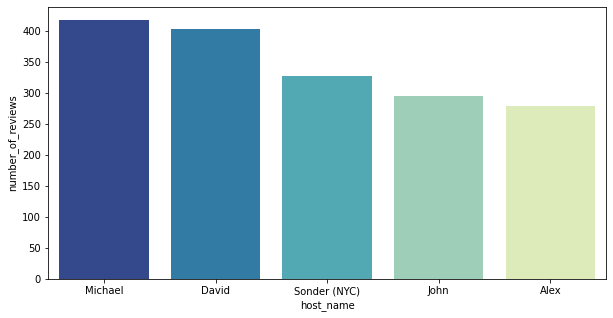

In [23]:
# Graphical Representation of Top 5 host has maximum no of reviews
plt.figure(figsize=(10,5))

sns.barplot(x="host_name",y='number_of_reviews',data = max_review, palette="YlGnBu_r")



### **Obsevation**
From above result, we can conclude that the name of the Host with most no. of reviews is
**Michael** followed by **David** and **Sonder (NYC)**

### **Question** - 3)  which neighbourhood group has most no of listing ?

In [24]:
# Checking which neighbourhood group has most no of listing
neighbour_grp =airbnb_data.groupby(['neighbourhood_group']).count()['calculated_host_listings_count'].reset_index().rename(columns={'calculated_host_listings_count':'no_of_listings'})
neighbour_grp = neighbour_grp.sort_values(by=['no_of_listings'], ascending=False)
neighbour_grp

,neighbourhood_group,no_of_listings
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


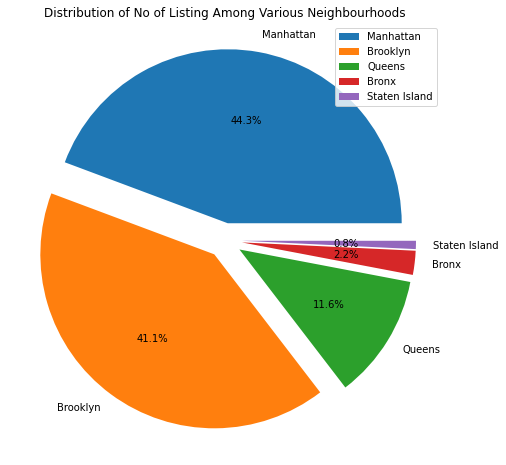

In [25]:
# Visualizing the neighbourhood group which has most no of listing
plt.figure(figsize=(12,8))
plt.pie(neighbour_grp['no_of_listings'],labels = neighbour_grp['neighbourhood_group'],autopct = '%1.1f%%',explode = [0.1,0.1,0.1,0.1,0.1])
plt.title("Distribution of No of Listing Among Various Neighbourhoods")
plt.legend()

### **Obsevation**
From above result, we  can conclude that the **Manhattan** has highest percentage of listings i.e 44.3%. Among all five neighbourhood groups **Manhattan** and **Brooklyn** has dominance. 


### Question 4) Which room type is prefered in most popular neighbourhood?
 From above analysis we already know that manhattan is most popular neighbourhood group. Hence we will only look for popular neighbourhood in **Manhattan**

In [45]:
# From above analysis we already know that manhattan is most popular neighbourhood group 
# Now lets find the most popular neighbourhood in Manhattan
manhattan_df = airbnb_data[airbnb_data['neighbourhood_group'] == 'Manhattan'] # Filtering entire data on neighborhood_group = Manhattan
manhattan_df.value_counts('neighbourhood')                                    # Finding unique values in neighbourhood of Manhattan

neighbourhood
Harlem                 2658
Upper West Side        1971
Hell's Kitchen         1958
East Village           1853
Upper East Side        1798
Midtown                1545
East Harlem            1117
Chelsea                1113
Lower East Side         911
Washington Heights      899
West Village            768
Financial District      744
Murray Hill             485
Kips Bay                470
Greenwich Village       392
Chinatown               368
SoHo                    358
Morningside Heights     346
Gramercy                338
Theater District        288
Nolita                  253
Inwood                  252
Tribeca                 177
Little Italy            121
Flatiron District        80
NoHo                     78
Roosevelt Island         77
Two Bridges              72
Battery Park City        70
Civic Center             52
Stuyvesant Town          37
Marble Hill              12
dtype: int64

### From above analysis we got to know about **Harlem** is most popular neighbourhood in **Manhattan**

In [50]:
# lets find the prefered room type in most popular neibhourhood 
harlem_df = manhattan_df[manhattan_df['neighbourhood'] == 'Harlem']
harlem_df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
30,front room/double bed,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,3,355
31,Spacious 1 bedroom in luxe building,Teri,Manhattan,Harlem,40.81305,-73.95466,Private room,52,2,88,1,255
33,back room/bunk beds,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,3,359
44,BEST BET IN HARLEM,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,1,309


In [72]:
# we look for prefered room type in most popular neibourhood.
popular_room_type_df = harlem_df.groupby(['neighbourhood','room_type']).count().reset_index()
popular_room_type_df

,neighbourhood,room_type,name,host_name,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Harlem,Entire home/apt,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
1,Harlem,Private room,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573
2,Harlem,Shared room,49,49,49,49,49,49,49,49,49,49


Text(0.5, 1.0, 'Prefered Room Type in Popular Neighbourhood')

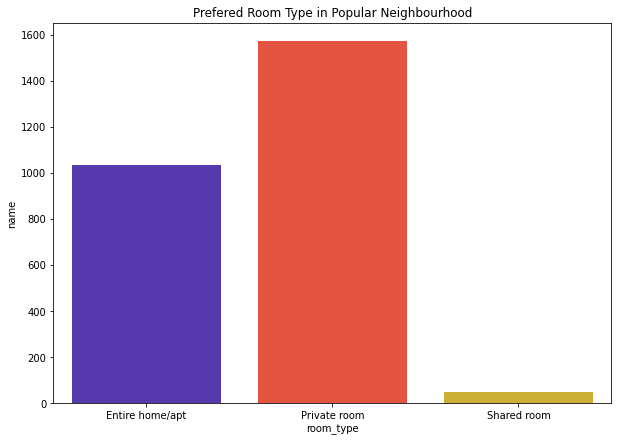

In [74]:
# Graphical Representation of prefered room type
plt.figure(figsize=(10,7))

sns.barplot(x="room_type",y="name",data =popular_room_type_df,palette='CMRmap')
plt.title("Prefered Room Type in Popular Neighbourhood")


### Private Room type is prefered by most of the people for stays.